# What factors guests care about most in choosing accomodations?
The aim of this notebook is to find the important factors when guests are choosing accomodations by generating word cloud according to reviews data.

In [17]:
import pandas as pd
import numpy as np
import PIL.Image as image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from os import path

In [3]:
reviews = pd.read_csv('Seattle_Airbnb_Open_Data\\reviews.csv')
print(reviews.shape)
reviews.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [10]:
reviews = reviews.dropna()

In [22]:
bg_img = plt.imread('house.jpg')

gather all comments together

In [21]:
comments = ''.join(list(reviews['comments'].values))
comments = comments.replace('\r', '')
comments = comments.replace('\n', '')
comments = comments.replace('Seattle', '')
comments[:5000]

'Cute and cozy place. Perfect location to everything! Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time.Went for a walk and found  Center with a major food festival in progress. What a treat.Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!Didn\'t really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a FridayClose to  Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you\'ll ever find).

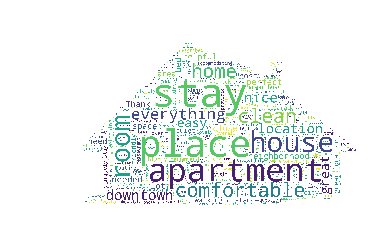

In [23]:
wordcloud =  WordCloud(background_color='white', mask=bg_img, max_words=2000, stopwords=STOPWORDS, max_font_size=150, scale=32, random_state=42)
wordcloud.generate_from_text(comments)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
wordcloud.to_file('reviews_wordcloud.jpg')

### Conclusion:
We can find that key words which frequently appear in reviews are "place", "stay", "apartment", "house", "comfortable", "clean", "room", which means that location, the property of listings, comfort, Cleanliness are important factors for guests in choosing accomodations. 